In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit

In [2]:
def virus_count_106(t):
    V = [np.power(2,i) for i in t]
    return V

def virus_count_109(t):
    V = [((np.power(10,6))*np.power(1.5, i))-200000*i for i in t]
    return V

In [3]:
x = np.linspace(0,20,100)
x2 = np.linspace(20,40,100)
y1 = virus_count_106(x)
y2 = virus_count_109(x)
y3 = np.power(10,9)

# untreated viral cell count (log scale)

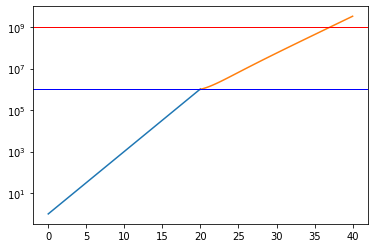

In [4]:
plt.plot(x, y1, x2, y2)
ax = plt.gca()
# ax.set_ylim([0,y3*1.1])
plt.axhline(y=y3, linewidth=1, color='r')
plt.axhline(y=np.power(10,6), linewidth=1, color='b')
plt.yscale('log')
plt.show()

# zoomed version without log scale

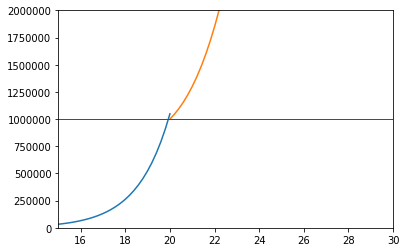

In [5]:
# zoomed version
# the discontinuity is because domain is (0,20) but you hit 10^6 at like 19 something
plt.plot(x, y1, x2, y2)
ax = plt.gca()
ax.set_ylim([0,y3*0.002])
ax.set_xlim([15,30])
plt.axhline(y=np.power(10,6), linewidth=1, color='r')
plt.show()

# recovery time wrt virus cell count

In [324]:
# basically just finding dV(t)/dt-5*10^8=0 (V(t) is the viral growth rate)
# and plotting t on y axis against V(t) on x axis
# it should be asymptotic at 10^9
V = np.linspace(np.power(10,6), np.power(10,9)*1.1, 1000)
def recov_time(v):
    T = 0
    cells = v
    while cells > 0:
        cells = cells*1.5-(5*np.power(10,8))
        T += 1
        if T > 60:
            break
    return T

def count_at_time(t):
    V = np.power(10,6)*np.power(1.5,t)
    return V

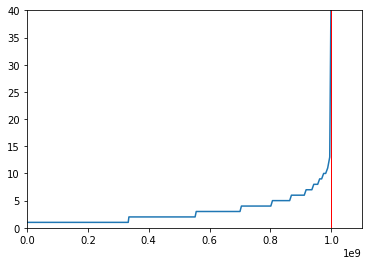

In [325]:
# the horizontal red line is at 1b viral cells
times = np.linspace(0,40,2400)
viral_counts = [count_at_time(t) for t in times]
recov_times = [recov_time(v) for v in viral_counts]
plt.plot(viral_counts, recov_times)
ax = plt.gca()
ax.set_xlim((0,np.power(10,9)*1.1))
ax.set_ylim((0,40))
plt.axvline(x=np.power(10,9), linewidth=1, color='r')
plt.show()

# exp smoothing the step function to get an average

In [335]:
# points to interp at
count_array = np.asarray(viral_counts)
count_array = count_array[count_array < np.power(10,9)]
times_array = np.asarray(recov_times)
times_array = times_array[0:len(count_array)]
count_array_normed = count_array/count_array.max()

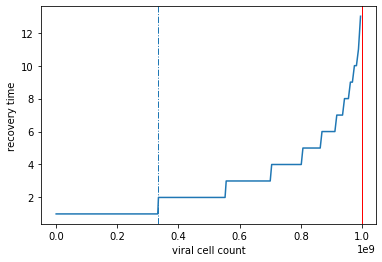

In [368]:
plt.plot(count_array, times_array)
# print(times_array_normed)
ax = plt.gca()
plt.axvline(x=np.power(10,9), linewidth=1, color='r')
plt.axvline(x=np.power(10,9)/3, linewidth=1, linestyle='-.')
plt.xlabel('viral cell count')
plt.ylabel('recovery time')
plt.savefig('recov_time_v_virus.png')
plt.show()

In [351]:
def exp_func(x, a, b, c):
    return (a)*np.exp(b*x)+c

In [352]:
x = count_array_normed
popt, pcov = curve_fit(exp_func, x, times_array)
popt

array([0.12859495, 4.2443439 , 0.85285755])

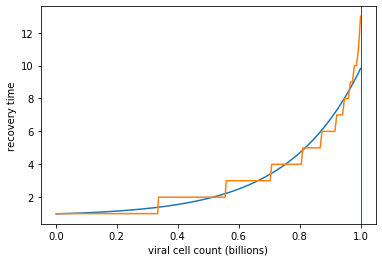

In [369]:
plt.plot(x, exp_func(x, *popt))
plt.plot(count_array_normed, times_array)
plt.axvline(x=1, linewidth=1, color='r')
plt.xlabel('viral cell count (billions)')
plt.ylabel('recovery time')
plt.savefig('recov_time_v_virus_smooth.png')
plt.show()

In [358]:
# since we have defined this function on [0,1] we just do integral(0,1)(exp_func))/(1) to get average
mean = 2.93463